# Partie 1

# Question 1 et 2

In [230]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Question 3

In [231]:
t1=0
t2=2
fe=100
d=1/fe
liste = np.arange(t1, t2, d)

liste

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

# Question 4

In [232]:
genSignal = lambda fun, f0, t, phi=0 : fun( 2 * np.pi * f0 * ( t - phi))

In [233]:
fe= 100
d = 1/fe

t = np.arange(t1, t2, d)

s1 = genSignal(signal.square,2,t)
s2 = genSignal(np.sin,5,t)
s3 = genSignal(signal.sawtooth,10,t)

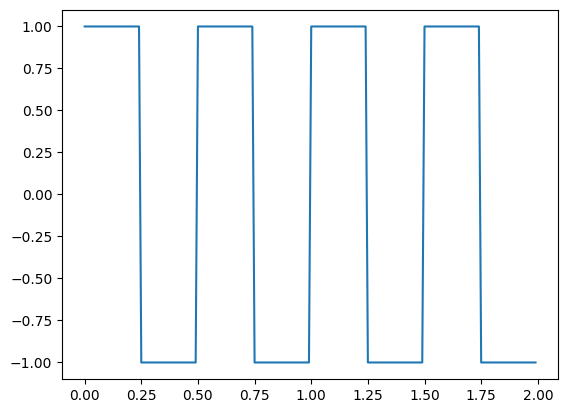

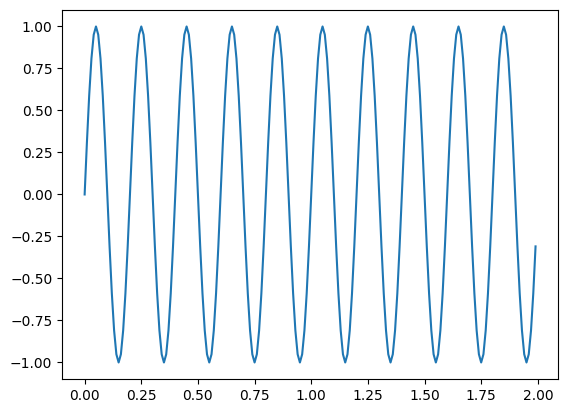

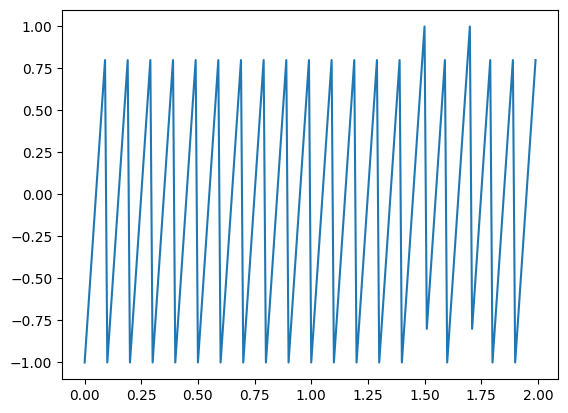

In [234]:
plt.plot(t,s1)
plt.show()
plt.plot(t,s2)
plt.show()
plt.plot(t,s3)
plt.show()

# Question 5

In [235]:
boxcar = signal.windows.boxcar
triang = signal.windows.triang
hamming = signal.windows.hamming

f1 = boxcar(len(t))
f2 = triang(len(t))
f3 = hamming(len(t))

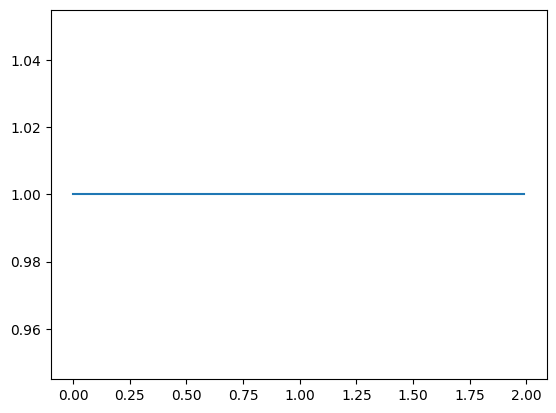

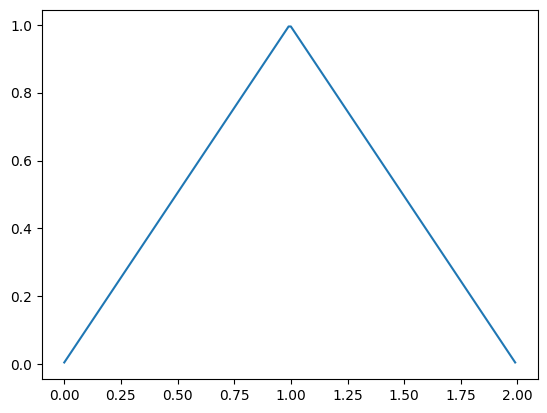

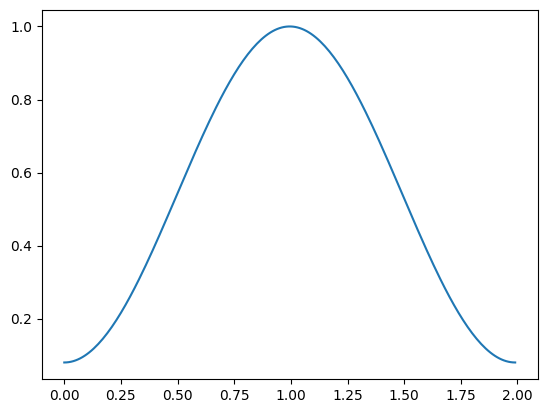

In [236]:
plt.plot(t,f1)
plt.show()
plt.plot(t,f2)
plt.show()
plt.plot(t,f3)
plt.show()

# Question 6

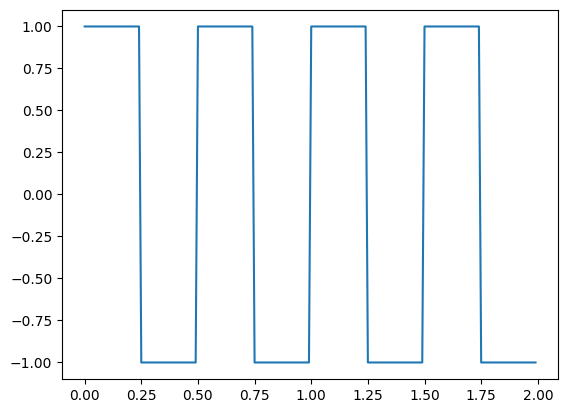

In [237]:
plt.plot(t,s1*f1)
plt.show()


On obtient le même signal carré. Ce qui est normal car on multiplie par une ligne droite.

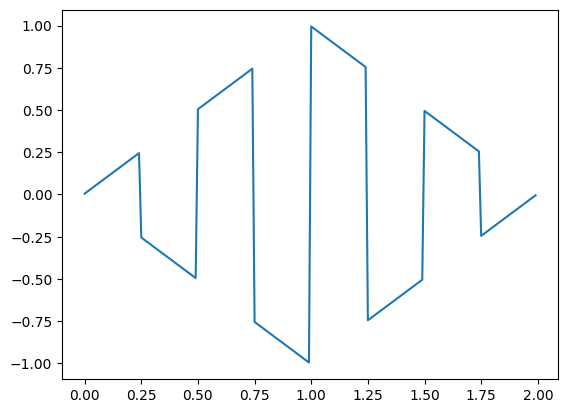

In [238]:
plt.plot(t,s1*f2)
plt.show()


Ici on multiplie le signal carré avec un triangle. Quand le carré est dans le négatif, on retrouve les composantes du triangle dans le négatif, et inversement avec le positif.

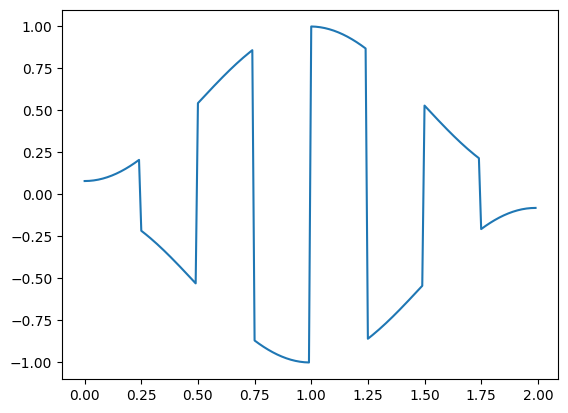

In [239]:
plt.plot(t,s1*f3)
plt.show()

Et ici multiplie avec la fenêtre de Hamming. Cela ressemble beaucoup à celui avec le triangle.

# Partie 2

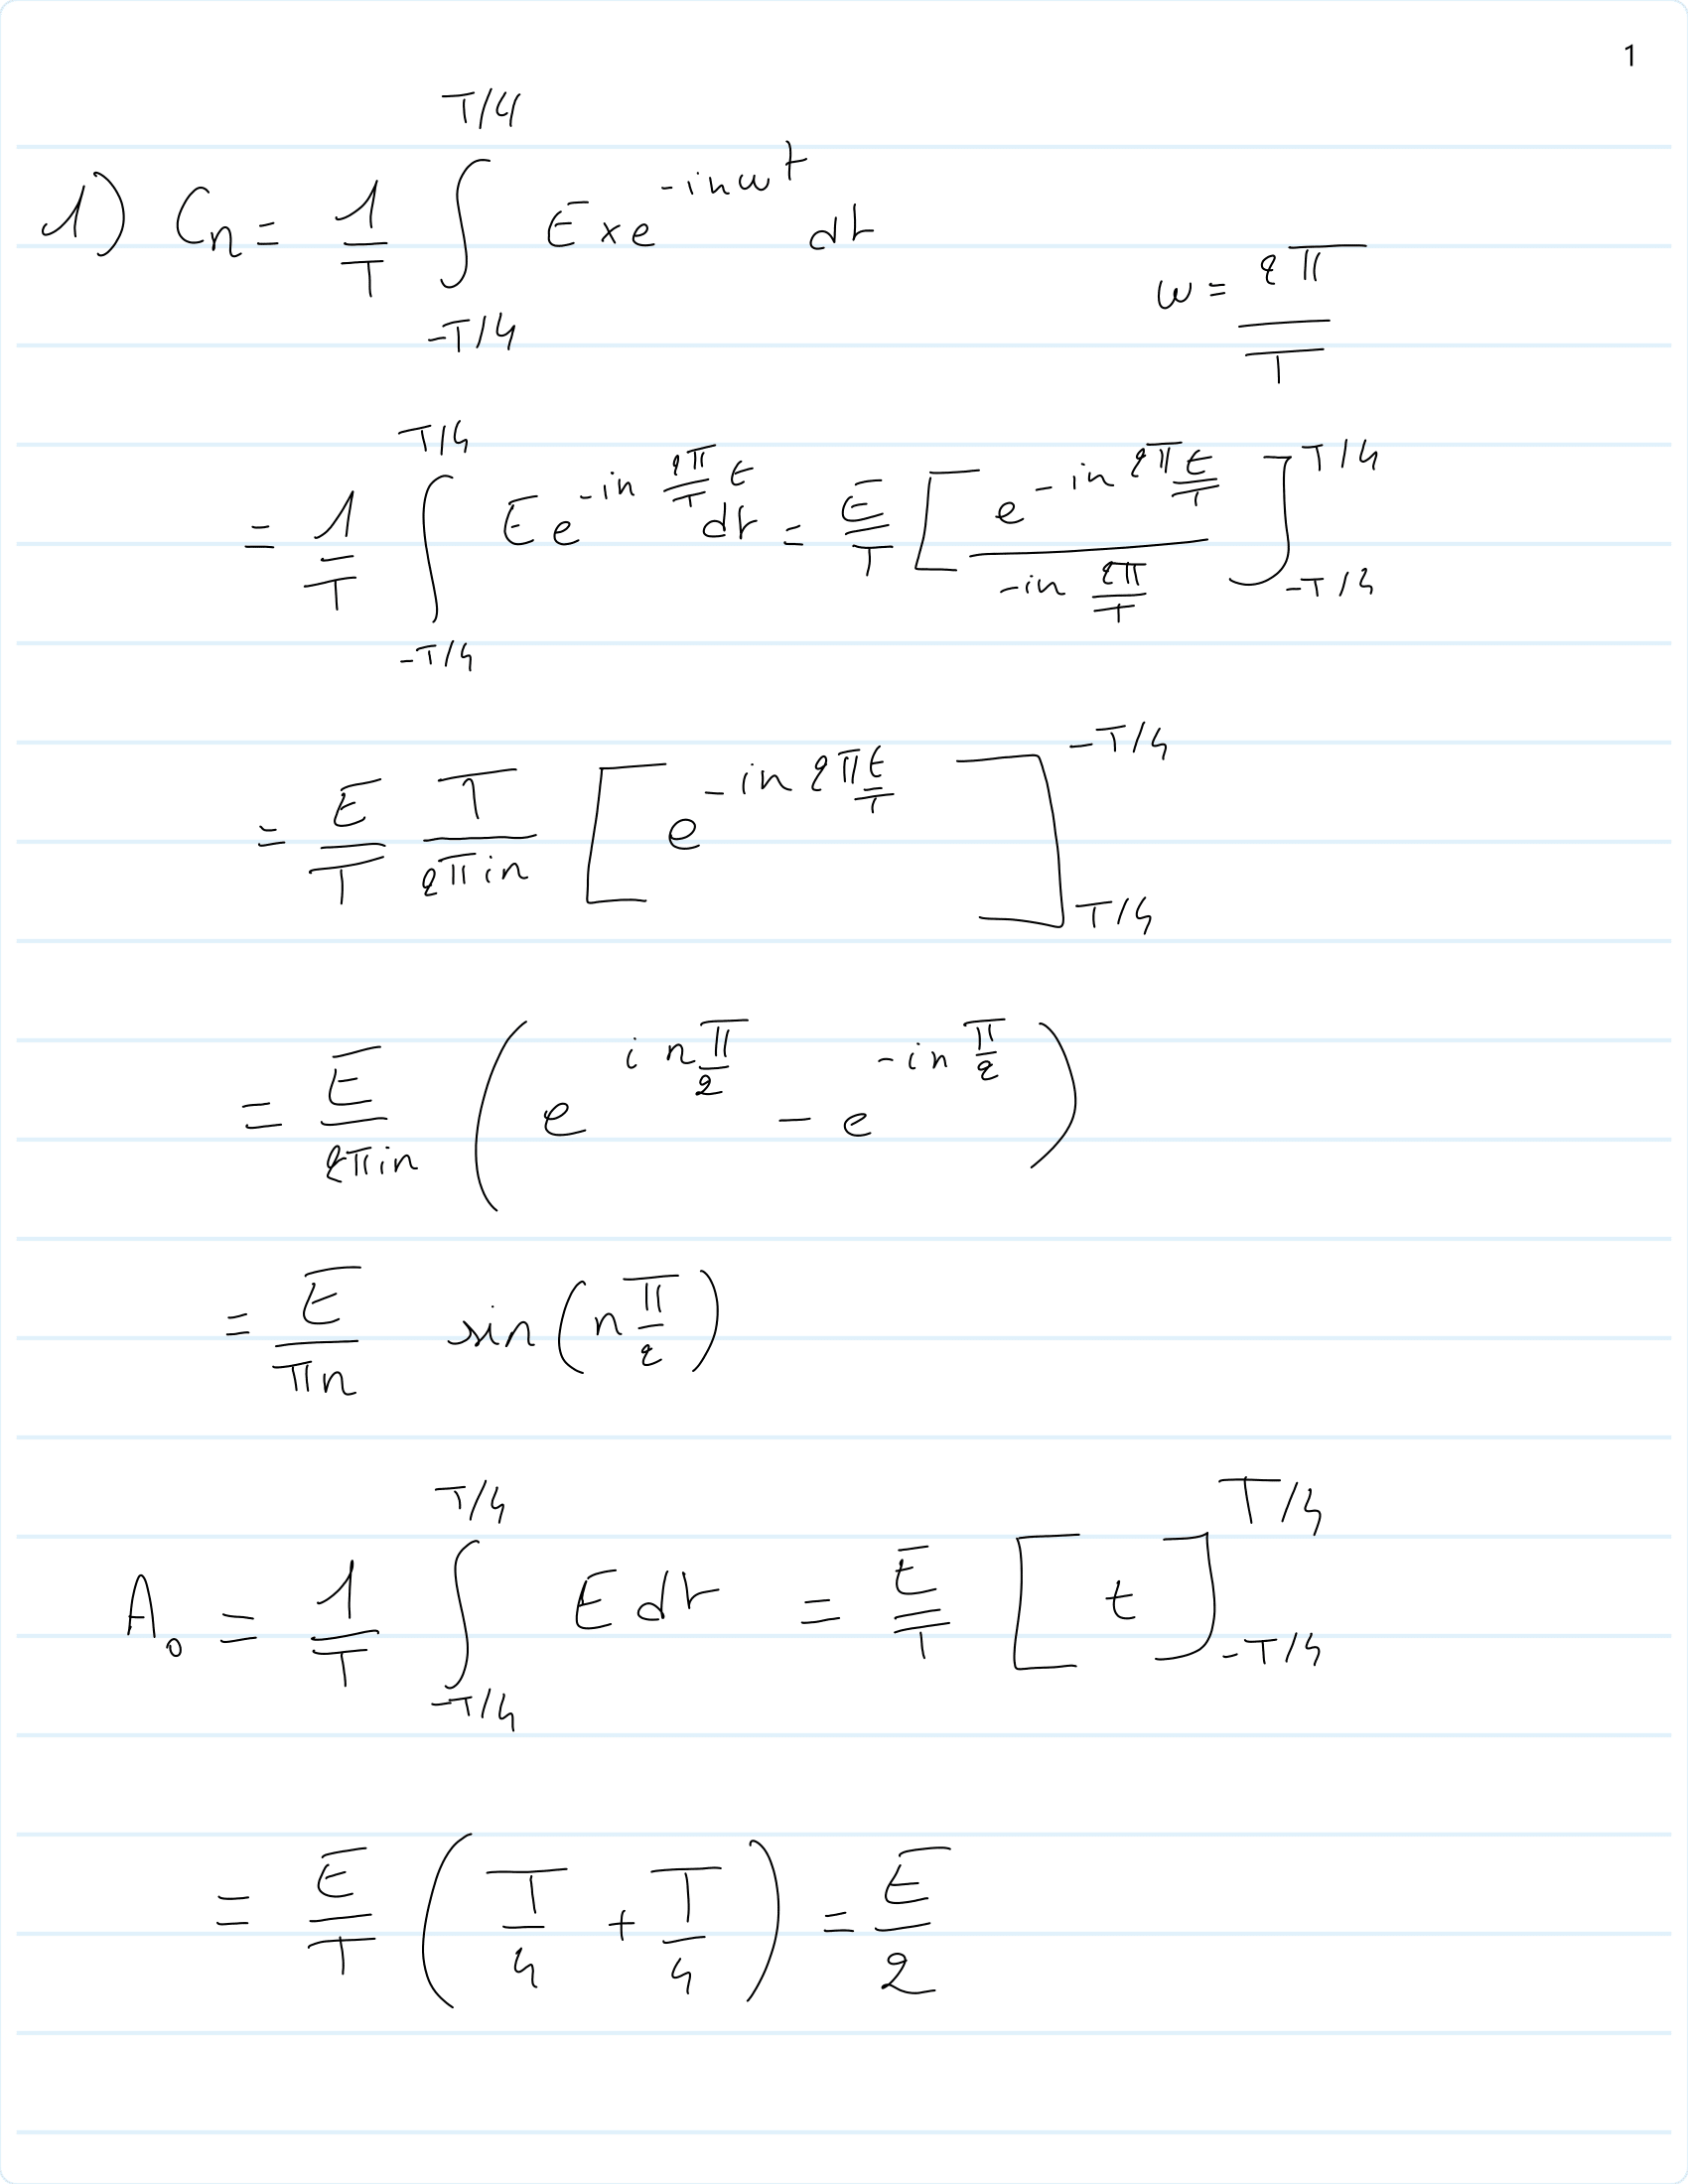
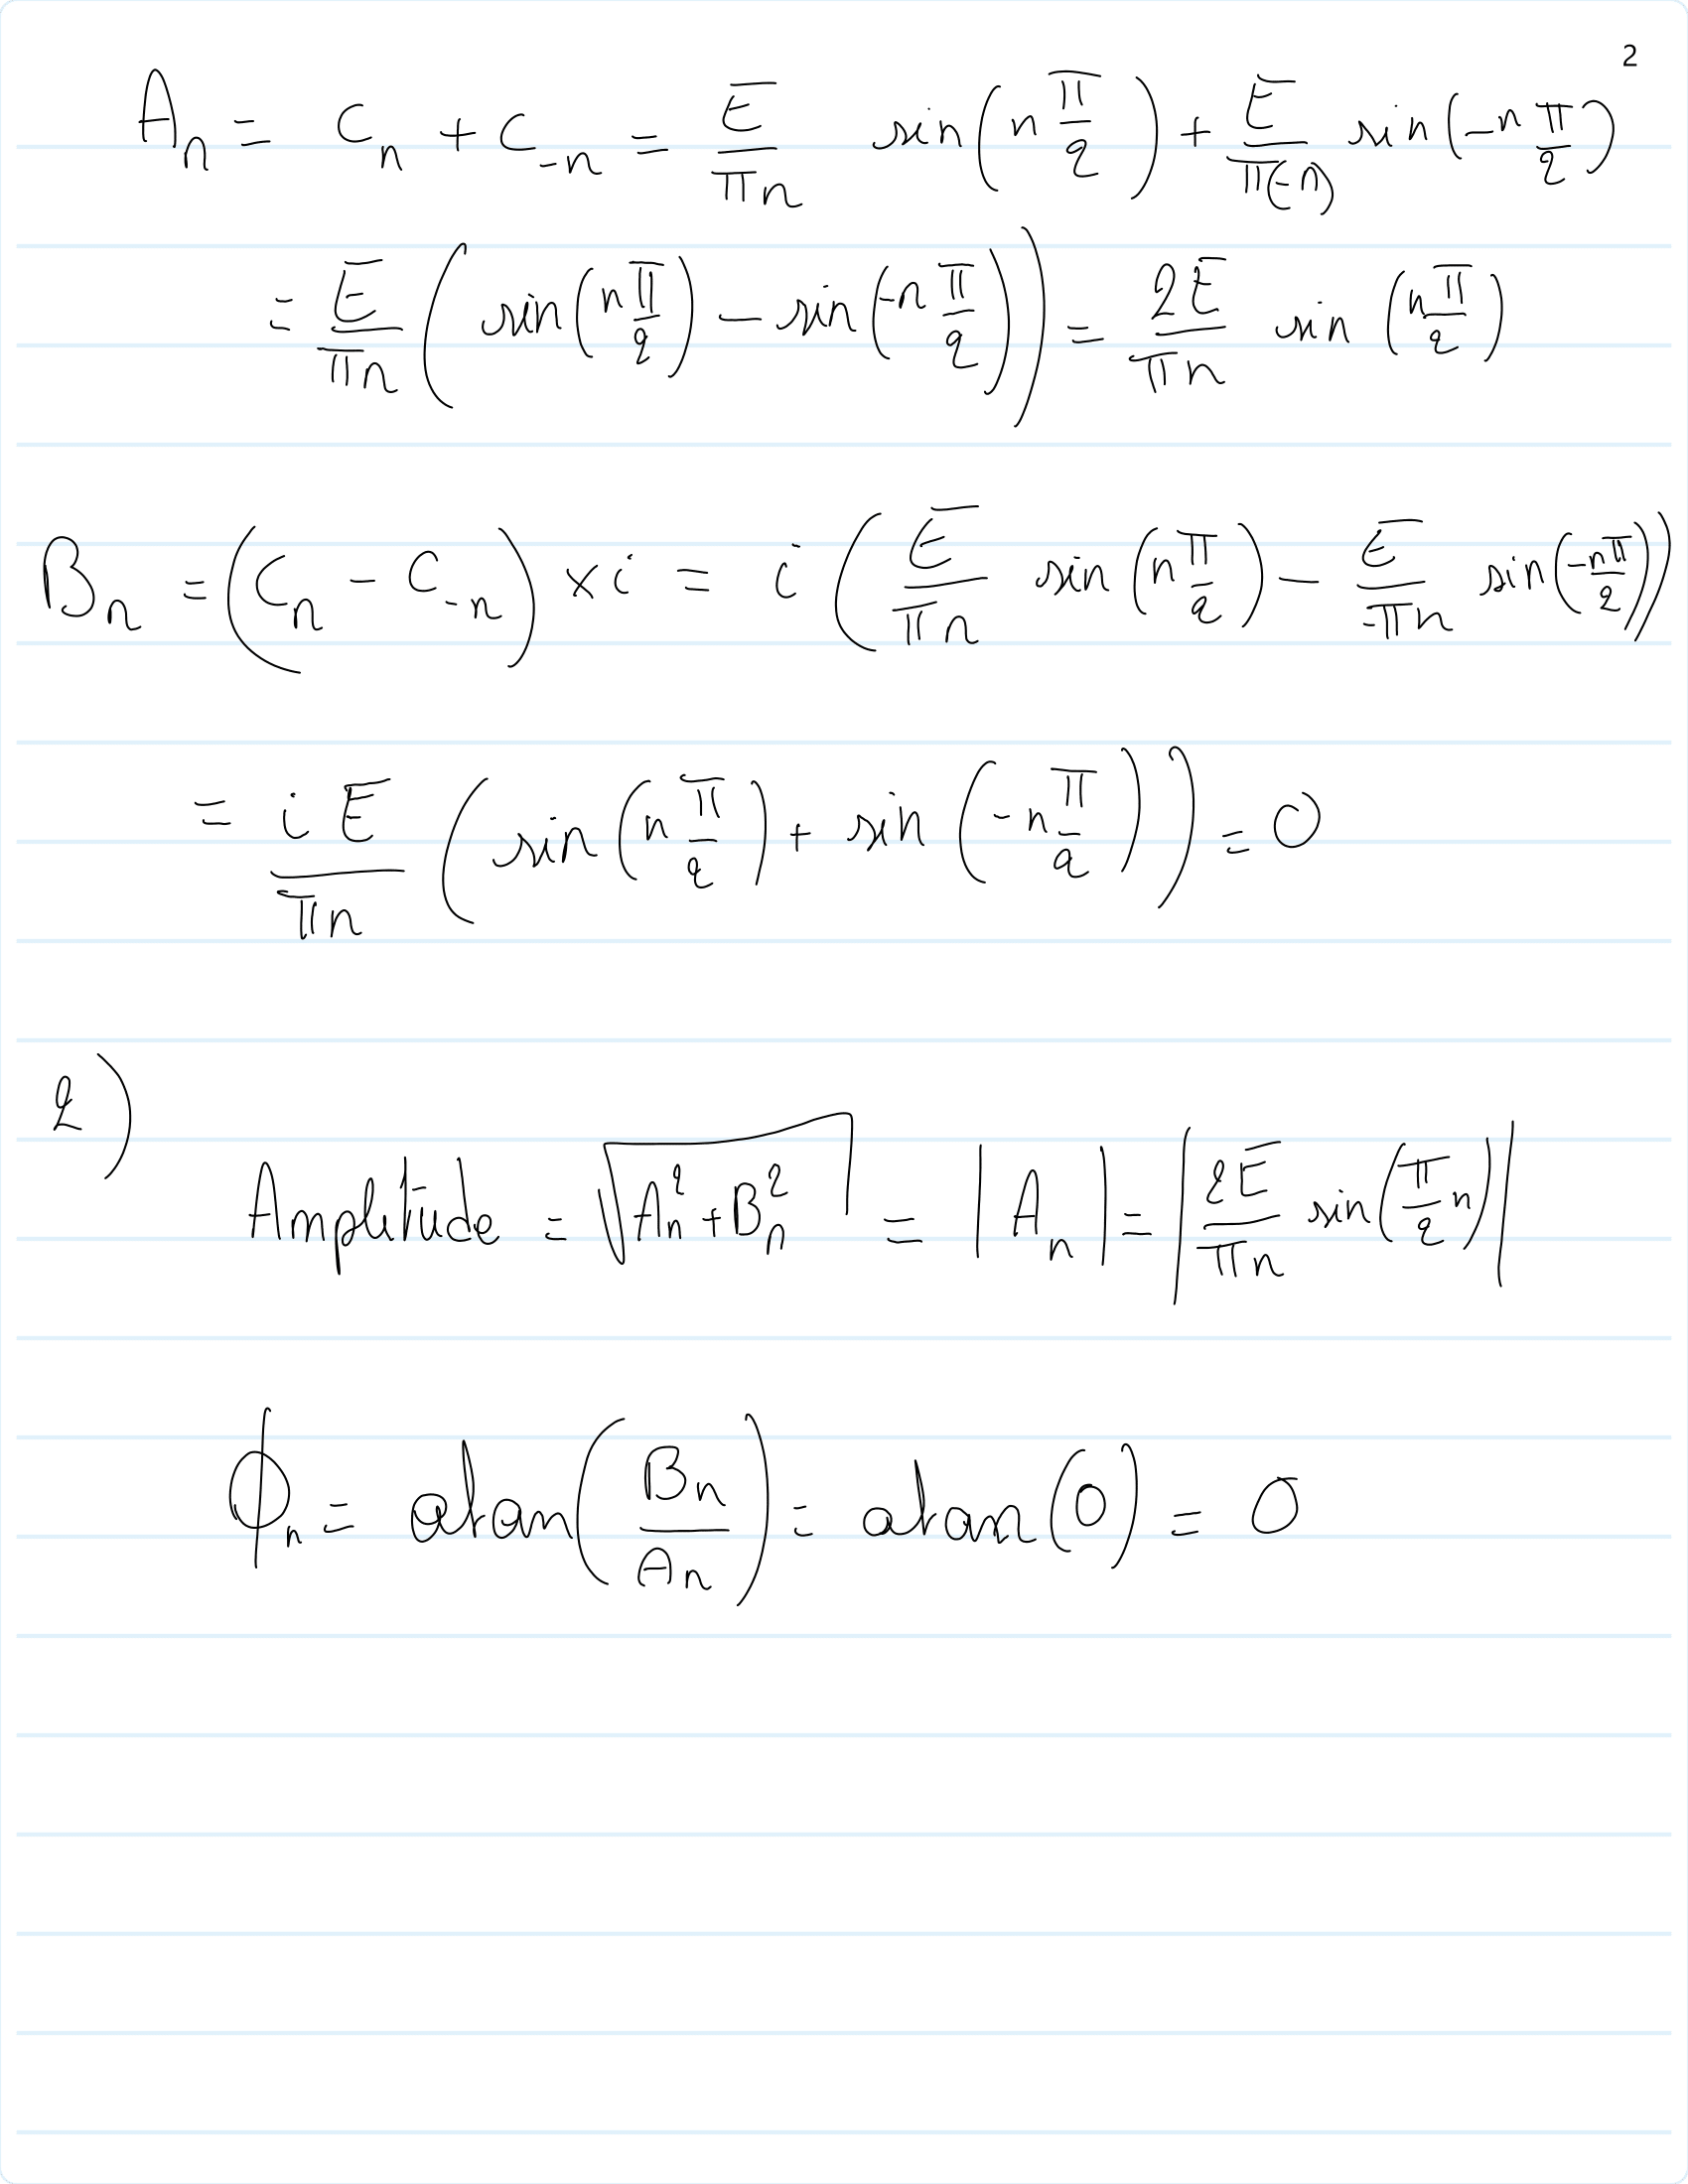 

# Question 1

In [240]:
fs = 1000
d = 1 / fs
t = np.arange(-1,1,d)

E = 2
f0 = 5

T = 1 / f0

sig = ( E * genSignal(signal.square,f0,t, T/4) + E ) / 2

# Question 2

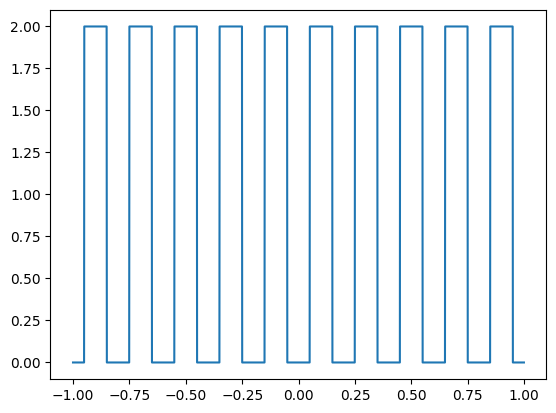

In [241]:
plt.plot(t,sig)
plt.show()

# Question 3

In [242]:
def harmonique(t,A0,fnAn,fnBn,T,n,phi=0):
    w = 2 * np.pi / T
    somme = A0
    Amp = [0]
    for k in range(1,n+1):
        A = fnAn(k)
        B = fnBn(k)
        somme += A * np.cos ( k * w * (t-phi) ) + B * np.sin ( k * w * (t-phi) )
        Amp.append((A**2+B**2)**0.5)
    return somme,Amp

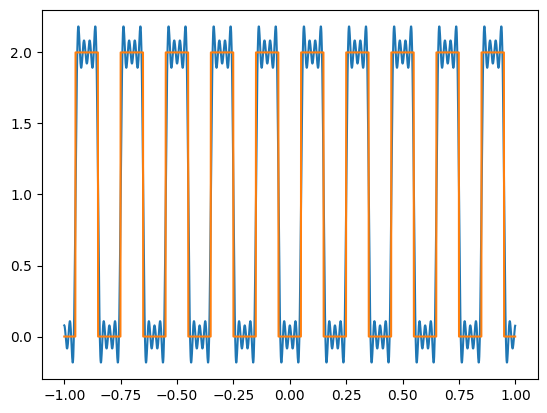

In [243]:
An = lambda k:2 * E / np.pi / k * np.sin( k * np.pi / 2 )
Bn = lambda k:0

he = harmonique(t,E/2,An,Bn,T,7,T/2)

plt.plot(t,he[0])
plt.plot(t,sig)
plt.show()

Le signal est une somme de cosinus, du coup c'est normal que ça ressemble à cela.

# Question 4

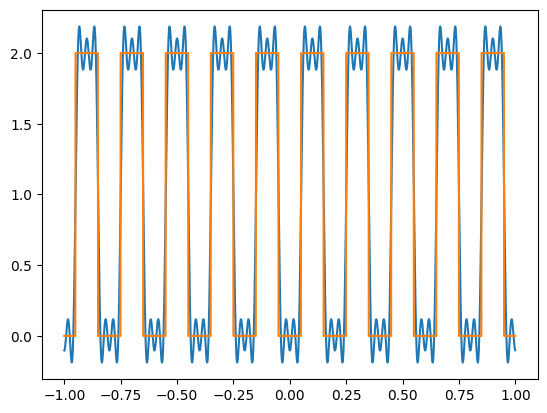

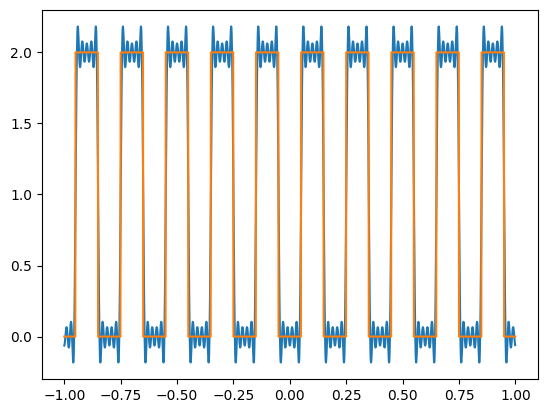

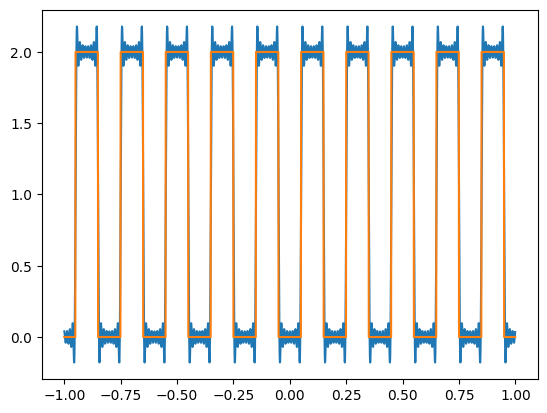

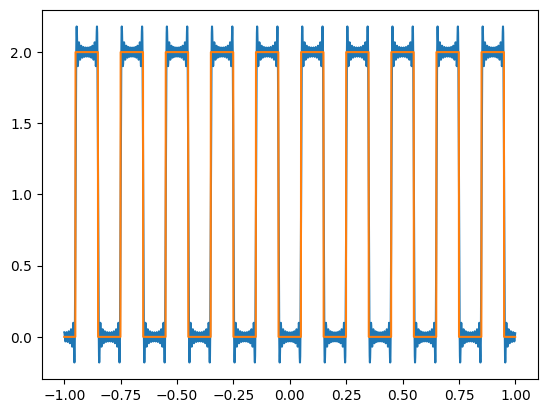

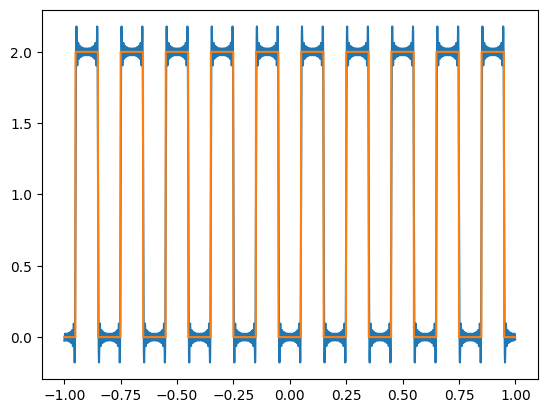

In [244]:
for n in range(5,30,5):
    he = harmonique(t,E/2,An,Bn,T,n,T/2)

    plt.plot(t,he[0])
    plt.plot(t,sig)
    plt.show()

à force qu'on va sommer, le signal va s'applanir et va ressembler de plus en plus à notre fonction square, sauf au niveau des bords, surement à cause du fait de la dérivé aux bords qui vaut l'infini.

# Question 5

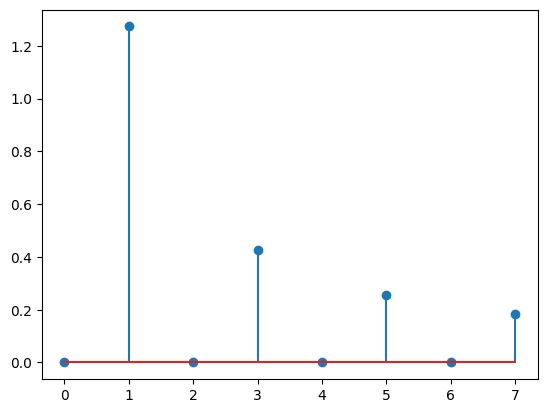

In [245]:
he = harmonique(t,E/2,An,Bn,T,7,T/2)

plt.stem(np.abs(he[1]))
plt.show()

In [246]:
he = harmonique(t,E/2,An,Bn,T,13,T/2)

np.abs(he[1][11])

0.11574904952137843

# Partie 2.2

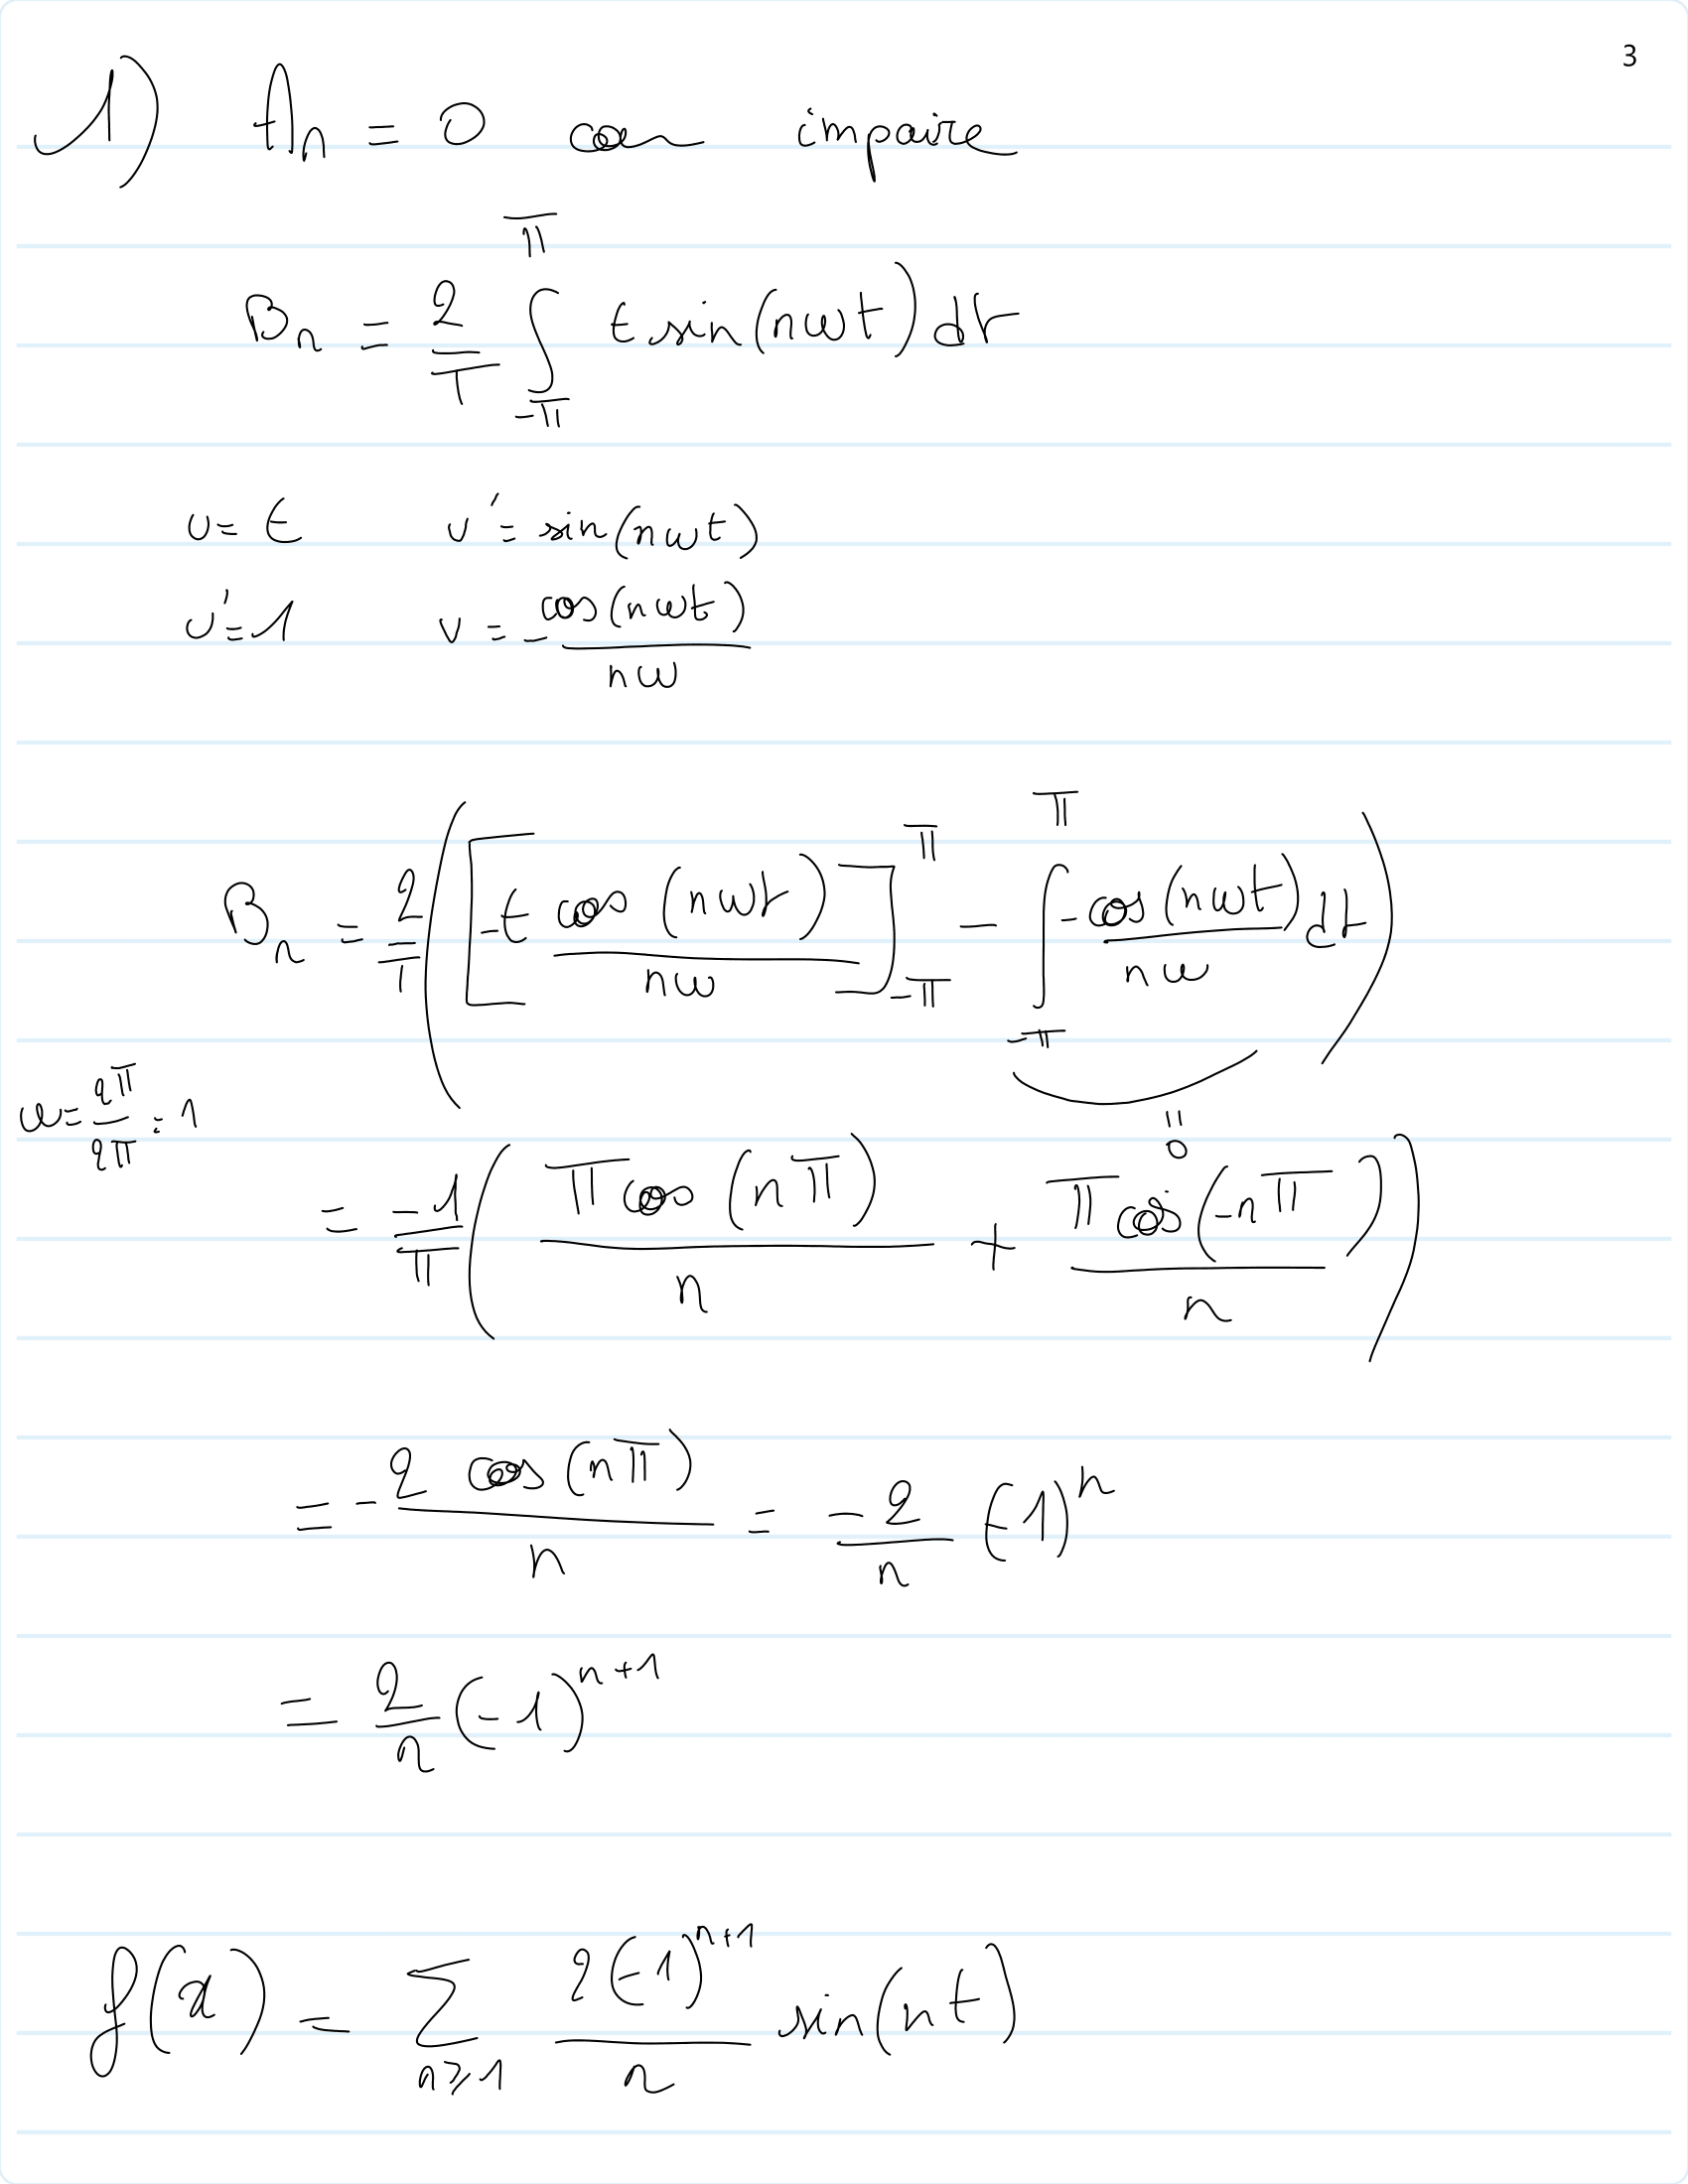
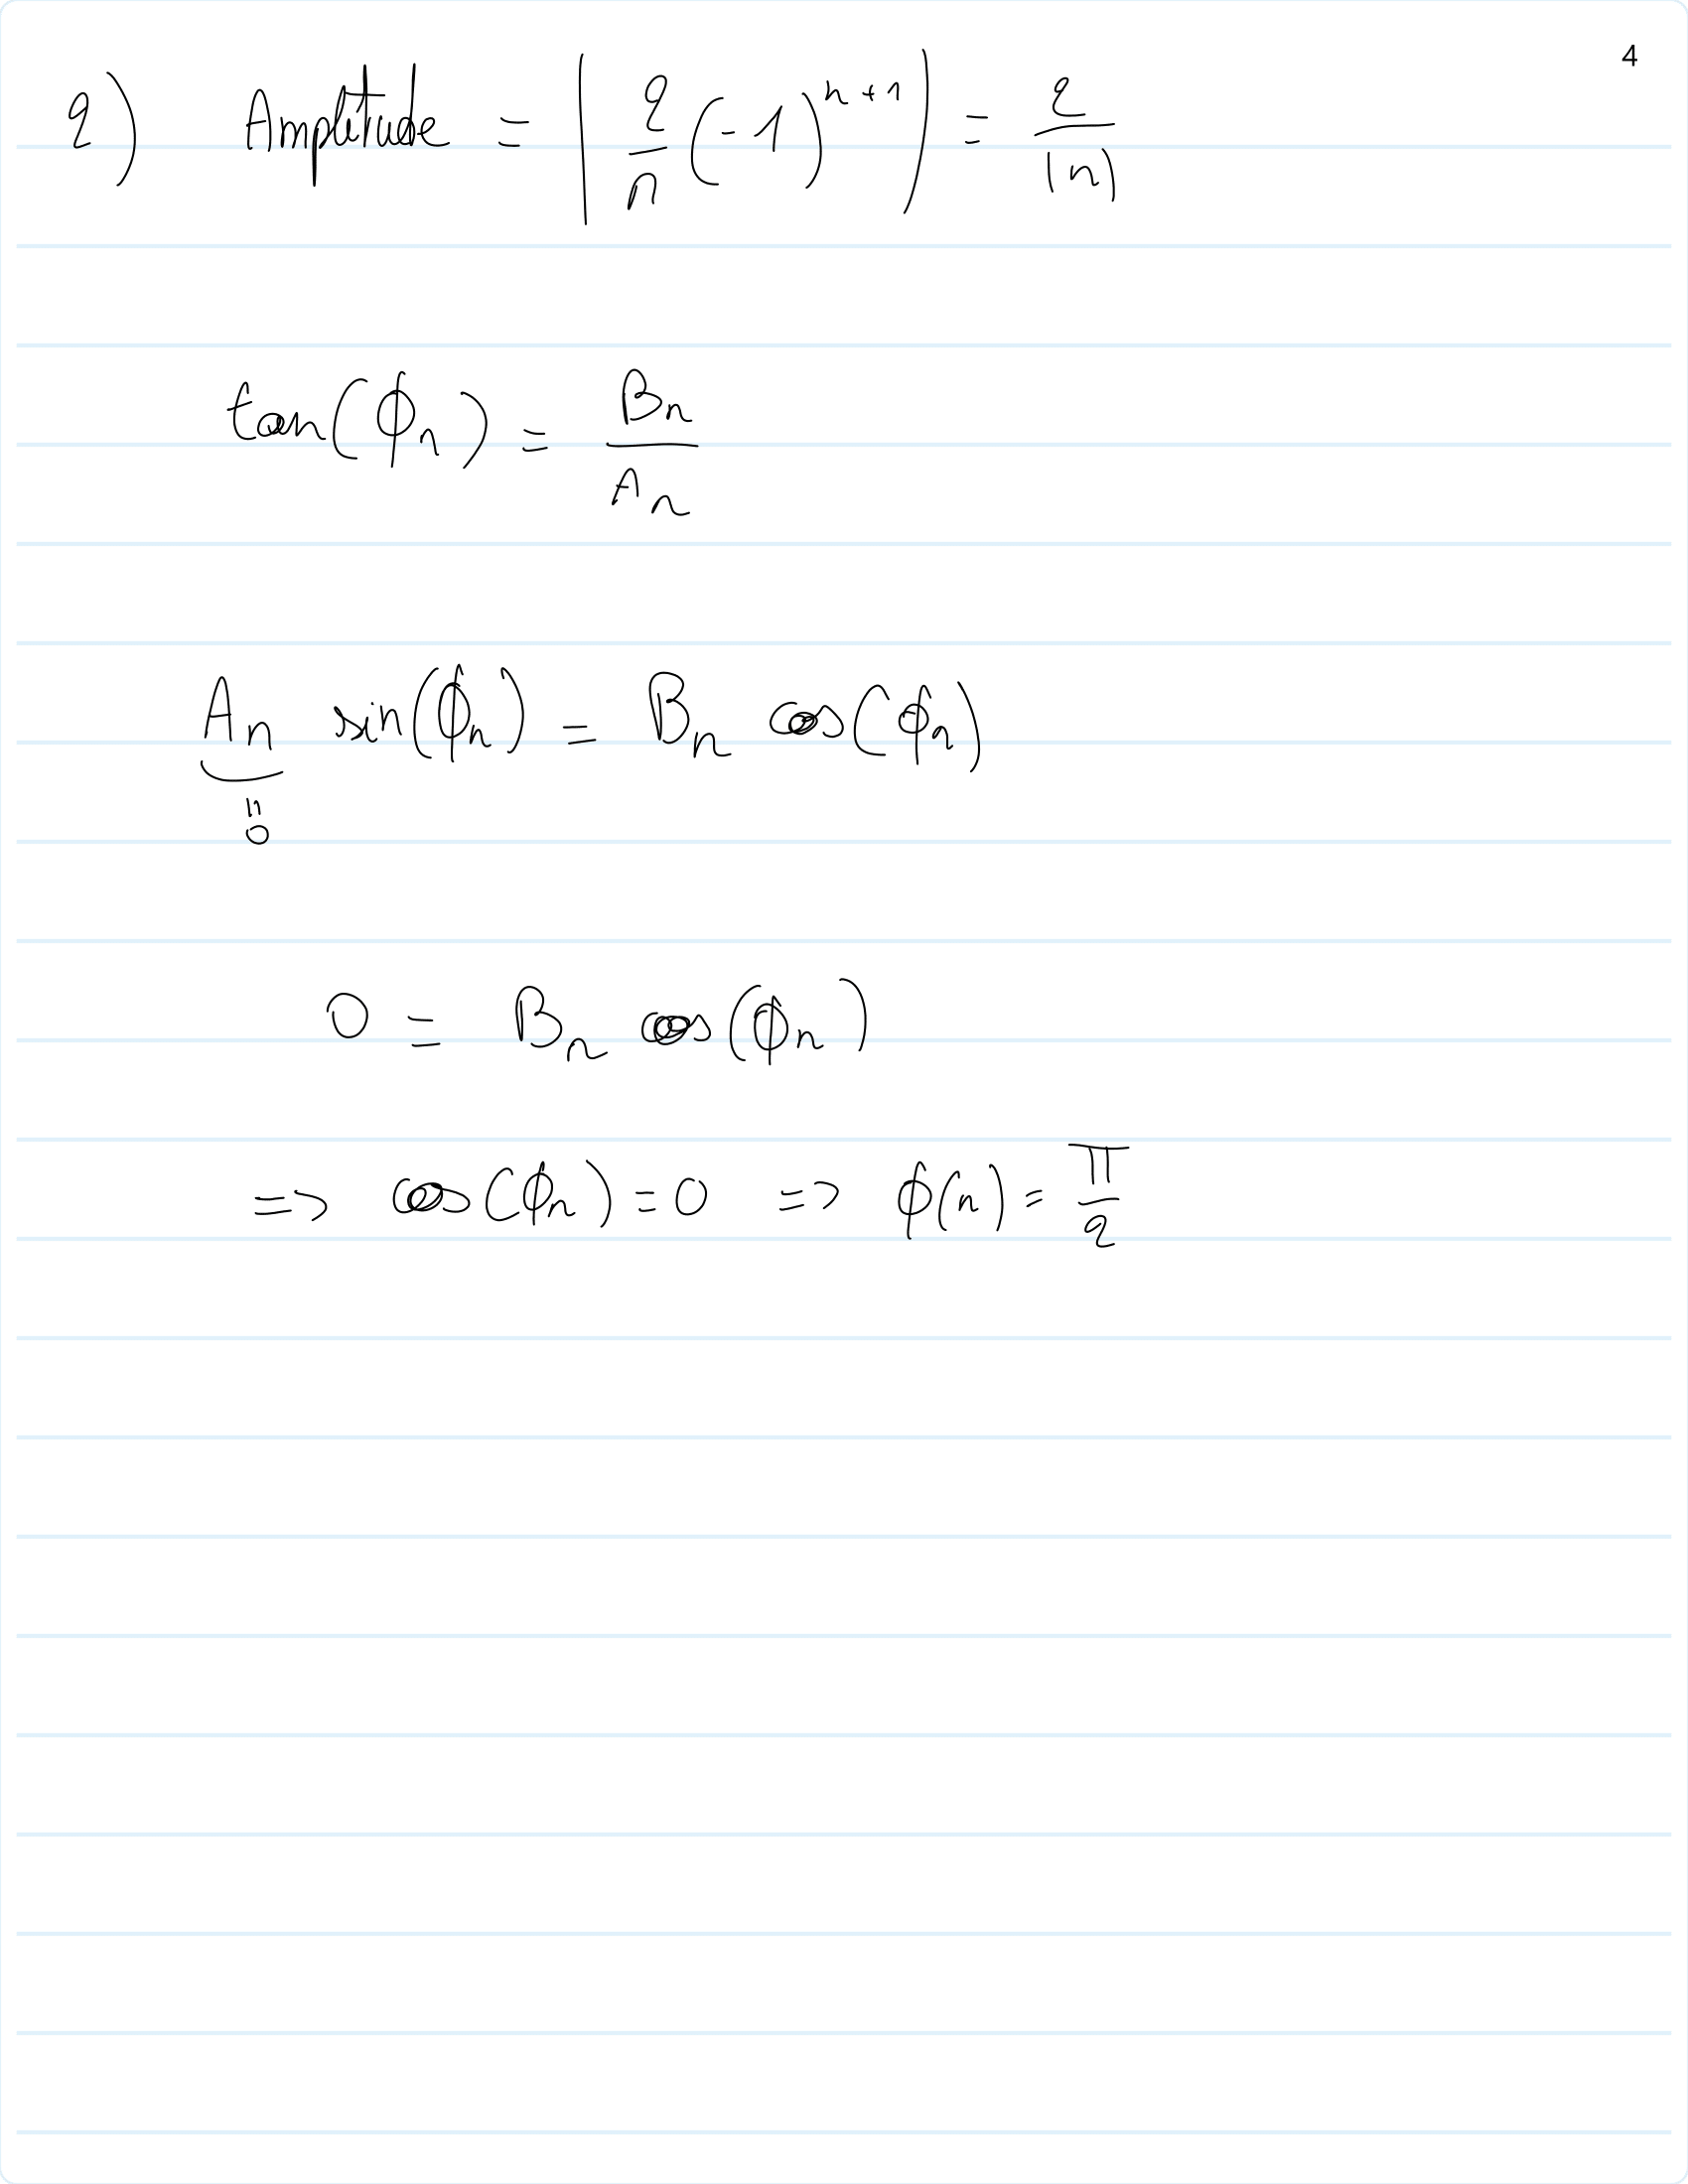

# Question 1


In [247]:
fs = 1000
d = 1 / fs
t = np.arange(-5,5,d)

E = np.pi

T = 2*np.pi
f0 = 1/T

sig = ( E * genSignal(signal.sawtooth,f0,t, T/2) )

# Question 2

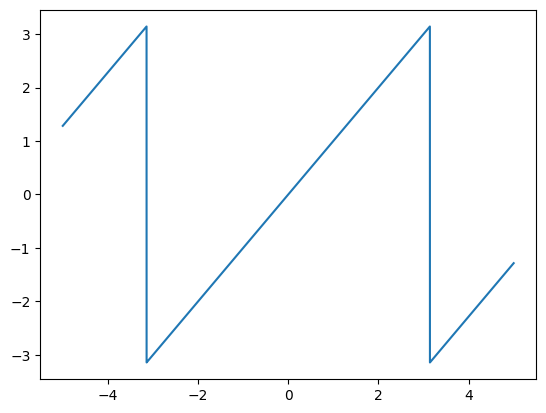

In [248]:
plt.plot(t,sig)

# Question 3

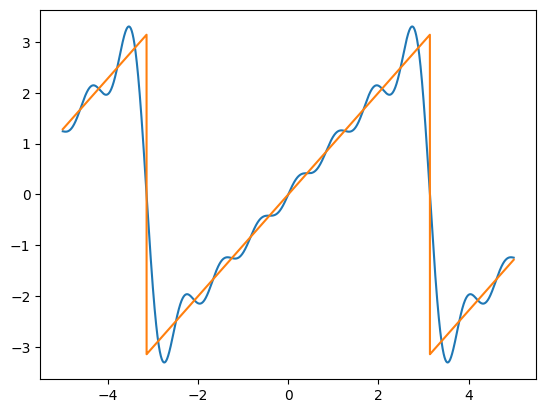

In [249]:
An = lambda k:0
Bn = lambda k:2/k * (-1)**(k+1) 

he = harmonique(t,0,An,Bn,T,7)

plt.plot(t,he[0])
plt.plot(t,sig)
plt.show()

# Question 4

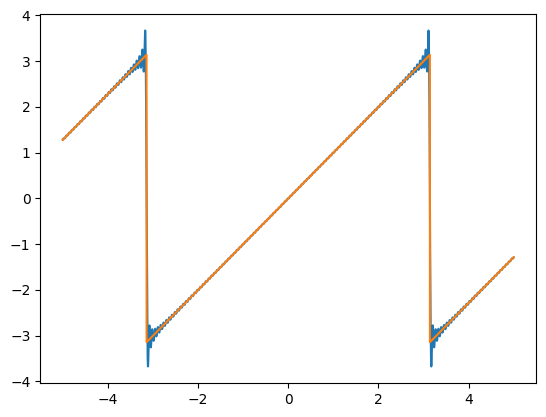

In [250]:
he = harmonique(t,0,An,Bn,T,100)

plt.plot(t,he[0])
plt.plot(t,sig)
plt.show()

# Question 5

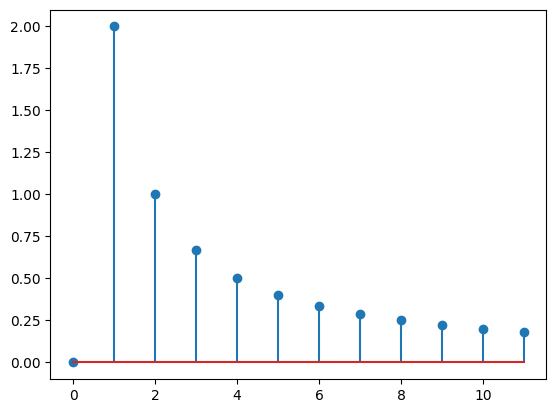

In [251]:
plt.stem(np.abs(he[1][0:12]))
plt.show()

In [252]:
he = harmonique(t,0,An,Bn,T,11)

np.abs(he[1][11])

0.18181818181818182

L'amplitude de l'harmonique de rang n=11 est plus élevé sur la dent de scie que sur le signal carré ( 0.182 > 0.116 ). De ce constat, on en déduit que le signal dent de scie est plus riche que le signal carré.